In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loan Approval Prediction Dataset

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem Statement

Company wants to automate the loan eligibility process  based on customer detail provided while filling application form online.
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
those are eligible for loan amount so that they can specifically target these customers.
Here they have provided a partial data set.


In [16]:
loan = pd.read_csv('downloads/df1_loan.csv')

In [17]:
loan

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


Dataset info

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


Checking the description of the dataset

In [19]:
loan.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


Checking for null values

In [23]:

nan_values = loan.isna()
nan_columns =nan_values.any()
nan_columns

Unnamed: 0           False
Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
Total_Income         False
dtype: bool

Dropping the null values

In [24]:
loan = loan.dropna()
loan

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N,$5754.0
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


Re-check if the null values is dropped

In [25]:
nan_values = loan.isna()
nan_columns =nan_values.any()
nan_columns

Unnamed: 0           False
Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
Total_Income         False
dtype: bool

Count Numbers of Categorical and Numeriacal columns

In [27]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


In [34]:
numerical_columns =['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount']
print(numerical_columns)

['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount']


Data visualization for Categorical columns

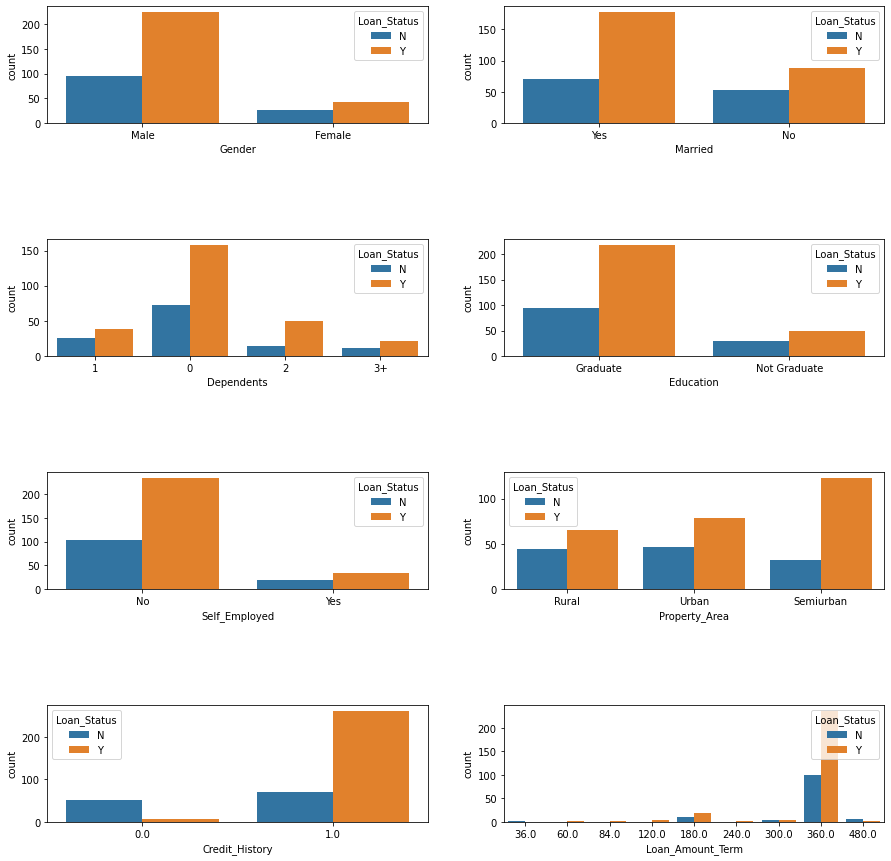

In [35]:
fig,axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Observation from the plots above

* Gender : There are more men than women
* Marital status : Married people are likely granted loan more than singles
* Dependants : Majority of the population have zero dependents and are also likely to accepted for loan
* Education :  About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
* Self_Employed:  About 5/6th of the population are self employed
* Propert_area : More applicants from Semi-urban and also likely to be granted loans.
* Credit History : Applicant with credit history are far more likely to be accepted.
* Loan Amount Term : Majority of the loans taken are for 360 Months (30 years).
* Loan Approval Status: About 2/3rd of applicants have been granted loan
    

Analyzing for Numerical columns

       CoapplicantIncome  ApplicantIncome  LoanAmount
count         390.000000       390.000000  390.000000
mean         1537.261333      5420.438462  142.289744
std          2268.942117      6025.716584   75.929142
min             0.000000       150.000000   17.000000
25%             0.000000      2883.750000  100.000000
50%          1062.000000      3901.000000  127.500000
75%          2250.000000      5827.000000  164.750000
max         20000.000000     81000.000000  600.000000


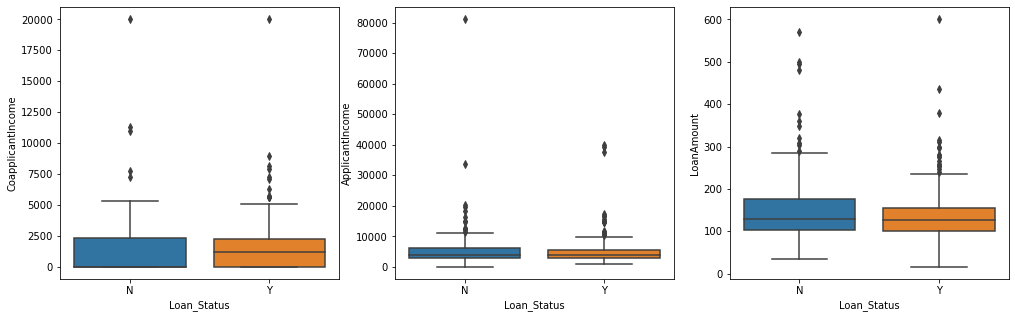

In [36]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan,x='Loan_Status',ax=axes[idx])

print(loan[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [ ]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

In [37]:
loan_encoded = pd.get_dummies(loan, drop_first = True)
loan_encoded.head()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Total_Income_$9328.0,Total_Income_$9504.0,Total_Income_$9508.0,Total_Income_$9538.0,Total_Income_$9560.0,Total_Income_$9613.0,Total_Income_$9703.0,Total_Income_$9734.0,Total_Income_$9762.0,Total_Income_$9862.0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2583,2358.0,120.0,360.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6000,0.0,141.0,360.0,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,5417,4196.0,267.0,360.0,1.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
########## Split Features and Target Varible ############
X = loan_encoded.drop(columns='Loan_Status_Y')
y = loan_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.7124521617291018
Validation Mean Accuracy:  0.7661034306195598


    Overfitting Problem
    
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. 
Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.



let's try tuning 'Max_Depth' of tree

In [47]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

In [48]:
for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)


In [50]:
training_acc = accuracy_score(y_train,y_training_pred)
train_f1 = f1_score(y_train,y_training_pred)
val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8136882129277566
Train Accuracy  0.6858974358974359
Validation Mean F1 Score:  0.40684290552215086
Validation Mean Accuracy:  0.6859190988223246


Random Forest: Test Data Evaluation

In [57]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6794871794871795
Test F1 Score:  0.8091603053435115
Confusion Matrix on Test Data


Predicted,1,All
True,,
0,25,25
1,53,53
All,78,78


Test Accuracy is 67%